In [31]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def readCSVFile(filePath):
    file = open(filePath)
    CSVReader = csv.reader(file)
    next(CSVReader)
    xColumn = []
    yColumn = []
    for row in CSVReader:
        xColumn.append(float(row[1]))
        yColumn.append(float(row[2]))
    return xColumn, yColumn

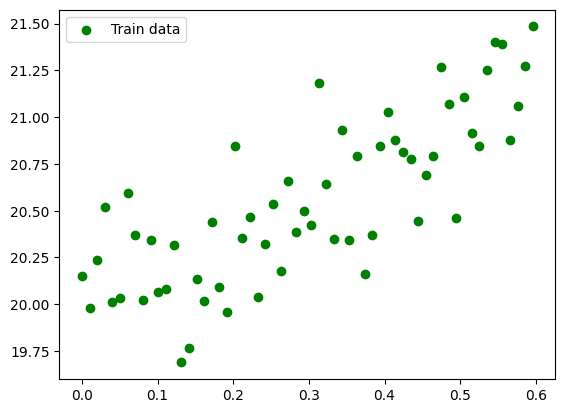

In [32]:
trainX, trainY = readCSVFile("lab_1_train.csv")

plt.scatter(trainX, trainY, label="Train data", color="green")
plt.legend()

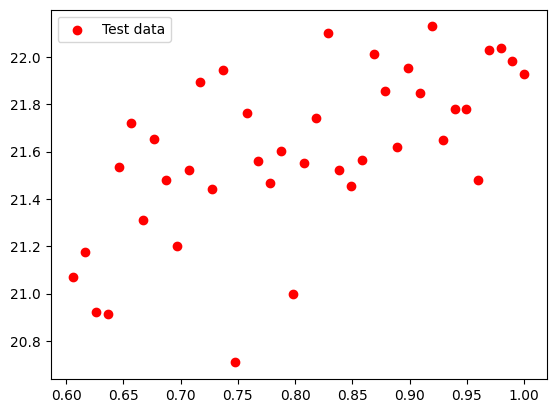

In [33]:
testX, testY = readCSVFile("lab_1_test.csv")

plt.scatter(testX, testY, label="Test data", color="red")
plt.legend()

In [34]:
# Add a bias term (column of ones) to the training and testing data
trainX = np.column_stack((np.ones(len(trainX)), trainX))
testX = np.column_stack((np.ones(len(testX)), testX))

# Initialize the weight vector with random values
w = np.random.rand(2)

def mse(y_true, y_pred):
  return np.mean((y_true - y_pred) ** 2)

# Function computes the gradient of the MSE loss function with respect to the weights (w). 
# The gradient determines the direction of the steepest descent in the loss function space, which 
# allows the model to learn by updating the weights in that direction during training.
def grad(x, y, w):
  return 2 * np.dot(x.T, (np.dot(x, w) - y))

epochs = 100
epochs_rate = 5
learning_rate = 0.01
losses = []

for epoch in range(epochs):
  # Update weights using gradient descent
  w -= learning_rate * grad(trainX, trainY, w)

  # Calculate and store loss after each epoch
  losses.append(mse(trainY, np.dot(trainX, w)))
   
  if epoch % epochs_rate == 0:
    print(f"Epoch {epoch}: w = {w}, loss = {losses[-1]}")

# Make predictions on test data
test_pred = np.dot(testX, w)

# Print test loss
print(f"Mean squared error between on test data: {mse(testY, test_pred)}")

Epoch 0: w = [24.32660034  7.91788536], loss = 38.80789923147328
Epoch 5: w = [18.85740976  5.51757702], loss = 0.4585547148415245
Epoch 10: w = [19.04443119  4.96513871], loss = 0.34659727056696543
Epoch 15: w = [19.18838892  4.49540849], loss = 0.2673088468436245
Epoch 20: w = [19.30974263  4.09957321], loss = 0.21100113616776509
Epoch 25: w = [19.41200871  3.76599814], loss = 0.17101347803554948
Epoch 30: w = [19.49818955  3.48489051], loss = 0.14261571894169495
Epoch 35: w = [19.57081515  3.2479978 ], loss = 0.12244867842918948
Epoch 40: w = [19.63201759  3.04836554], loss = 0.10812679050525667
Epoch 45: w = [19.68359361  2.88013308], loss = 0.09795591423917795
Epoch 50: w = [19.72705733  2.73836161], loss = 0.09073293326283452
Epoch 55: w = [19.76368472  2.61888913], loss = 0.08560343873160951
Epoch 60: w = [19.79455105  2.51820827], loss = 0.08196066101531144
Epoch 65: w = [19.82056247  2.43336332], loss = 0.07937369471491333
Epoch 70: w = [19.8424826   2.36186348], loss = 0.0775

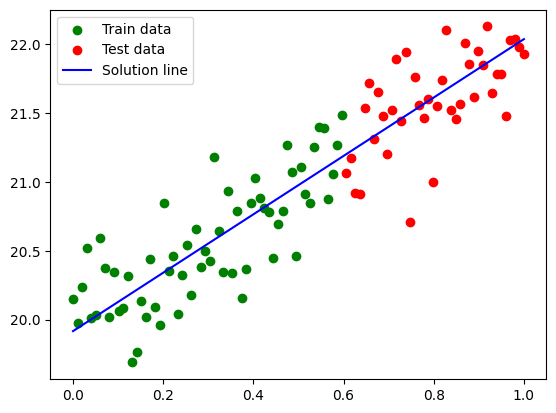

In [35]:
plt.scatter(trainX[:, 1], trainY, label="Train data", color="green")
plt.scatter(testX[:, 1], testY, label="Test data", color="red")
plt.plot([0, 1], [w[0], w[0] + w[1]], color="blue", label="Solution line")
plt.legend()